In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
def basis(x1, x2):
    """compute basis (design) matrix"""
    s = 1.75  # bandwidth (length-scale)
    return np.exp((-(x1 - x2) ** 2) / (2 * s ** 2))

In [3]:
# Linear regression with l2-regularizer
#
# Author: Fangtong Liu
# Date: 06/13/2020
# Author: Aaditya Gala
# Date: 09/13/2023

# create a dataset
z = np.arange(0, 8.1, 0.1)
y = np.exp(-0.1 * z) * np.cos(z)

# pick some training points randomly
N = 15  # number of training points
idx = np.random.choice(np.arange(len(z)), N, replace=False)
x = z[idx]  # training input
t = y[idx] + 0.05 * np.random.randn(N, 1).reshape(-1)  # noisy target

In [4]:
# here we solve for w in a linear model y = w^T * phi
# compute basis (design) matrix
xx, xy = np.meshgrid(x, x)
Phi = basis(xx, xy)
Phi = np.hstack([np.ones((N,1)), Phi])

# solve for w using least squares with l_2 regularizer
w = np.dot(Phi.T, Phi) + 0.1 * np.eye(Phi.shape[1])
w = np.dot(np.linalg.inv(w), np.dot(Phi.T, t))

# predict at arbitrary inputs
xx, xy = np.meshgrid(z, x)
Phi_test = basis(xx, xy)
Phi_test = Phi_test.T
Phi_test = np.hstack([np.ones((z.shape[0], 1)), Phi_test])

y_test = np.dot(Phi_test, w)  # predict all at once

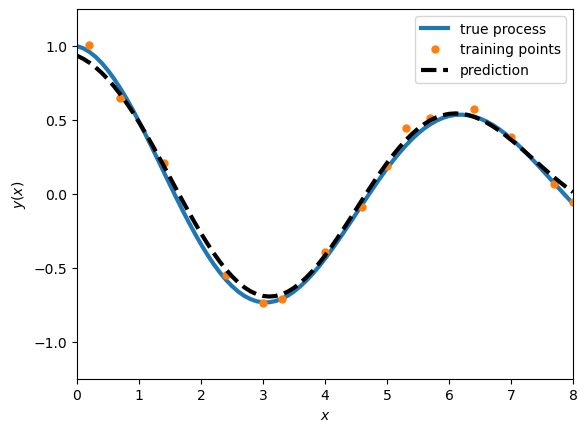

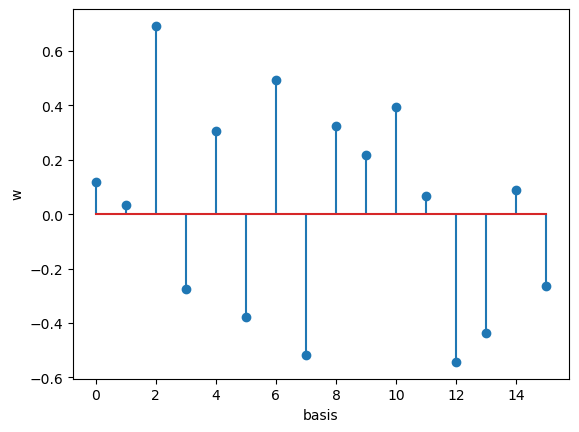

In [5]:
##################### plotting ##################
# plot the true process and training points
fig1 = plt.figure()
plt.plot(z, y, linewidth=3, label='true process')
plt.plot(x, t, '.', markersize=10, label='training points')
plt.plot(z, y_test, '--', color='k', linewidth=3, label='prediction')
plt.legend(loc='best')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.xlim([0, 8])
plt.ylim([-1.25, 1.25])
# fig1.savefig('lin_reg.png')
plt.show()

fig2 = plt.figure()
plt.stem(w)
plt.xlabel('basis')
plt.ylabel('w')
# fig2.savefig('lin_reg_w.png')
plt.show()

In [6]:
# Minimum Norm Convex Optimization
#
# Author: Aaditya Gala
# Date: 09/13/2023
# Author: Maani Ghaffari
# Date: 09/21/2023

w_cvx = cp.Variable(Phi.shape[1])
objective = cp.Minimize(cp.sum_squares(w_cvx))
# objective = cp.Minimize(cp.pnorm(w_cvx, p=2)**2)
# constraints = [Phi @ w_cvx == t]
tol = 1e-1 # tolerance for imprecision
constraints = [cp.abs(Phi @ w_cvx - t) <= tol]
prob = cp.Problem(objective, constraints)

# The optimal objective is returned by prob.solve().
result = prob.solve(verbose=False)
# The optimal value for w_cvx
# print(w_cvx.value)
# print(result)

In [7]:
# print(f'Shape of Phi = {Phi.shape}')
# print(f'Rank of Phi = {np.linalg.matrix_rank(Phi)}')
# print(f'Rank of Phi.T = {np.linalg.matrix_rank(Phi.T)}')
# print(f'Rank of [[I] [Phi]] = {np.linalg.matrix_rank(np.vstack((np.eye(Phi.shape[0], Phi.shape[1]), Phi)))}')
# print(type(Phi_test))
# print(type(w_cvx.value))
# # print(type(np.array(w_cvx.value, dtype=float)))
# # w_values = np.array(w_cvx.value, dtype=float)
# print(w_cvx.value)

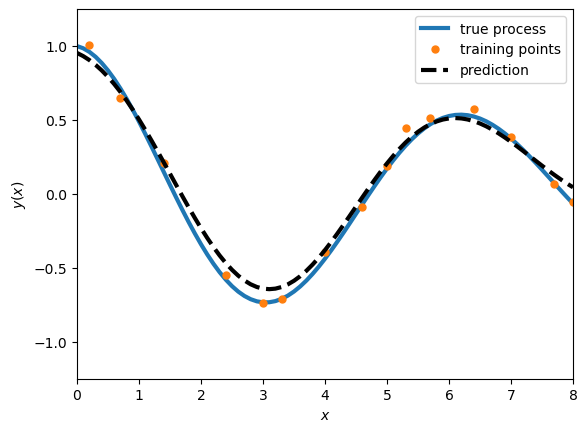

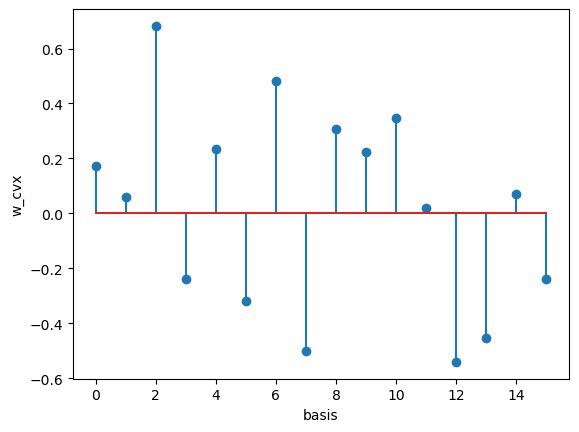

In [8]:
# y_test2 = np.dot(Phi_test, w_cvx.value)
w_values = np.array(w_cvx.value, dtype=float)
# print(w_values.shape)
y_test2 = np.dot(Phi_test, w_values)
# print(y_test2)

# plot the true process and training points
fig3 = plt.figure()
plt.plot(z, y, linewidth=3, label='true process')
plt.plot(x, t, '.', markersize=10, label='training points')
plt.plot(z, y_test2, '--', color='k', linewidth=3, label='prediction')
plt.legend(loc='best')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')
plt.xlim([0, 8])
plt.ylim([-1.25, 1.25])
# fig3.savefig('lin_reg_cvx.png')
plt.show()

fig4 = plt.figure()
plt.stem(w_values)
plt.xlabel('basis')
plt.ylabel('w_cvx')
# fig4.savefig('lin_reg_w_cvx.png')
plt.show()